# Linear Regression

## Graduate Admissions


## a) Objective

To predict the chance of admission of foreign students to Master's programs

## b) Dataset

Data set – Size of the data, # of features, example features

I'll work with the Admission_Predict.csv file from the <a href='https://www.kaggle.com/mohansacharya/graduate-admissions/downloads/graduate-admissions.zip/2'>Kaggle Website</a>. It contains parameters which are considered important during the application for Masters Programs.  

The dataset contains a serial number to identify each row and it also has numerical value columns:


1. GRE Scores ( out of 340 ) 
2. TOEFL Scores ( out of 120 ) 
3. University Rating ( out of 5 ) 
4. Statement of Purpose and Letter of Recommendation Strength ( out of 5 ) 
5. Undergraduate GPA ( out of 10 ) 
6. Research Experience ( either 0 or 1 ) 
7. Chance of Admit ( ranging from 0 to 1 )

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LinearRegression

In [91]:
admissions = pd.read_csv('Admission_Predict.csv')
admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [92]:
admissions.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [93]:
admissions.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


## c) Exploratory Data Analysis

Based on information above, there are no null values and cleaning is not necessary. 

In [94]:
#Removing white spaces from column's names

for col in admissions.columns:
    admissions.rename(columns={col:col.replace(' ','_')},inplace=True)

admissions.columns


Index(['Serial_No.', 'GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP',
       'LOR_', 'CGPA', 'Research', 'Chance_of_Admit_'],
      dtype='object')

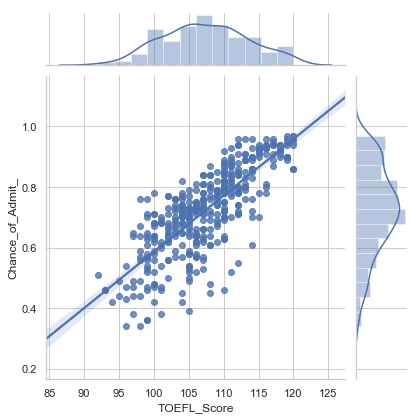

In [95]:
sns.set(style="whitegrid") 
j = sns.jointplot(x='TOEFL_Score', y='Chance_of_Admit_', data=admissions, kind='reg')

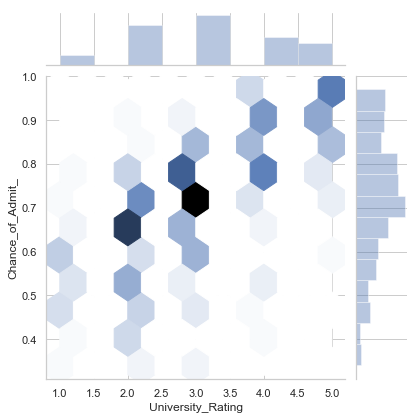

In [96]:
j = sns.jointplot('University_Rating','Chance_of_Admit_', data=admissions, kind='hex')

**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.(Don't worry about the the colors)**

Relationships Between different Tests Score and The Chance to Be Admitted in College


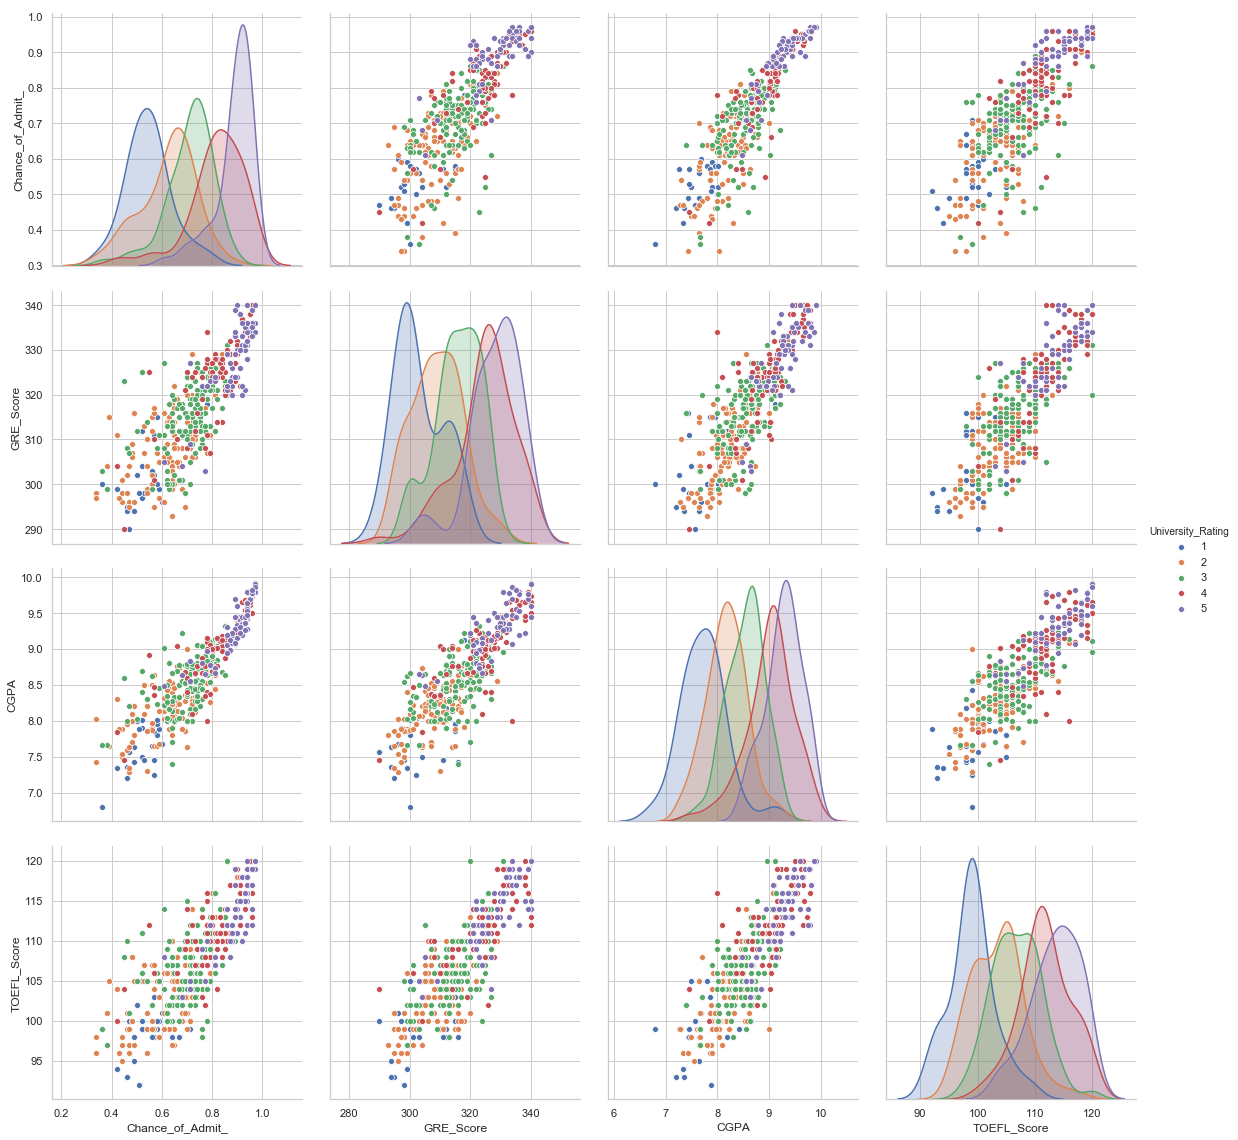

In [97]:
print('Relationships Between different Tests Score and The Chance to Be Admitted in College') 
g = sns.pairplot(admissions, 
                  x_vars=["Chance_of_Admit_","GRE_Score", "CGPA","TOEFL_Score"],
                  y_vars=["Chance_of_Admit_","GRE_Score", "CGPA","TOEFL_Score"],  
                  hue="University_Rating",
                  height=4)


## d) Methodology/ML techinque used 

Explanation....

### Linear Regression

In [98]:
#Defining features (X) and target (y)

X = admissions[['GRE_Score', 'CGPA','TOEFL_Score']]
y = admissions['Chance_of_Admit_']

In [99]:
#Splitting the data into training and testing sets

X_training, X_test, y_training, y_test = train_test_split(X,y,test_size=0.3, random_state=101)

### Training the Model

In [100]:
#Creating an instance of a LinearRegression() model named lm
lm = LinearRegression()

In [101]:
#Training and fittin lm on the training data
lm.fit(X_training, y_training)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [102]:
#Printing coefficients
print(lm.coef_)

[0.0026459  0.14121795 0.00337623]


### Predicting Test Data

In [108]:
y_predicted = lm.predict(X_test)

Text(0,0.5,'Y Predicted')

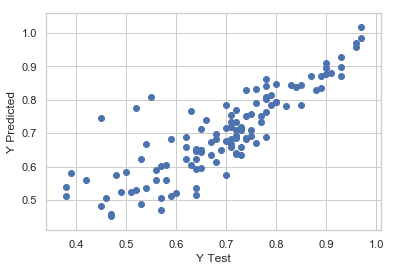

In [109]:
# Creating a scatterplot of  real test values vs predicted values.

plt.scatter(y_test,y_predicted)
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')

## e) Measuring the Model

In [110]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

MAE = mean_absolute_error(y_test, y_predicted)
MSE = mean_squared_error(y_test, y_predicted)
RMSE = np.sqrt(MSE)

print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('RMSE: {}'.format(RMSE))

MAE: 0.04969948172897158
MSE: 0.005194129162554813
RMSE: 0.07207030707964836


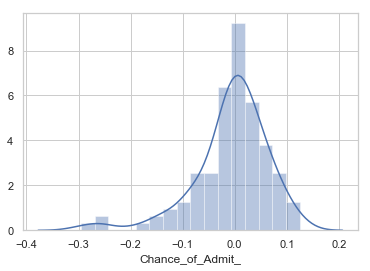

In [111]:
#Using a histogram of the residuals and make sure it looks normally distributed. 

sns.distplot(y_test-y_predicted)

In [107]:
#Verifying the coefficients

coeficient = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeficient

,Coefficient
GRE_Score,0.002646
CGPA,0.141218
TOEFL_Score,0.003376


## Conclusion

- The visualization above presents a normal distribution, it means the model is accuracy
- Holding all other features fixed, a 1 unit increase in GRE Score is associated with an increase of 0.002646 total chance to be admitted
- Holding all other features fixed, a 1 unit increase in GPA Score is associated with an increase of 0.141218 total chance to be admitted
- Holding all other features fixed, a 1 unit increase in TOEFL_Score is associated with an increase of 0.003376 total chance to be admitted
- GPA Score is the most impactful feature on the chance to be admitted